In [932]:
import pandas as pd
from glob import glob
import ROOT as r
import matplotlib.pyplot as plt

# Data Cleaning and Preparation

In [933]:
dxs = glob("../data/Data/*")

In [934]:
dxs

['../data/Data/Yellow.tsv',
 '../data/Data/Blue.tsv',
 '../data/Data/Green.tsv',
 '../data/Data/Violet.tsv',
 '../data/Data/Cyan.tsv']

In [935]:
#read a tsv file using pandas

df = pd.DataFrame()

for dx in dxs:
    tmp = pd.read_csv(dx, sep='\t')
    tmp["color"] = dx[13:-4]
    df = pd.concat((df,tmp))

In [936]:
df

,Voltage (mV),Current (mA),color
0,"0,00","2,40",Yellow
1,"54,00","1,70",Yellow
2,"82,90","1,48",Yellow
3,"118,40","1,21",Yellow
4,"181,40","0,74",Yellow
...,...,...,...
14,"1,136V","-0,13",Cyan
15,"1,263V","-0,13",Cyan
16,"1,461V","-0,15",Cyan
17,"1,621V","-0,14",Cyan


In [937]:
def replace_commasep(x):
    return x.replace(",",".")

In [938]:
df["Voltage (mV)"] = df["Voltage (mV)"].apply(replace_commasep)
df["Current (mA)"] = df["Current (mA)"].apply(replace_commasep)

In [939]:
df

,Voltage (mV),Current (mA),color
0,0.00,2.40,Yellow
1,54.00,1.70,Yellow
2,82.90,1.48,Yellow
3,118.40,1.21,Yellow
4,181.40,0.74,Yellow
...,...,...,...
14,1.136V,-0.13,Cyan
15,1.263V,-0.13,Cyan
16,1.461V,-0.15,Cyan
17,1.621V,-0.14,Cyan


In [940]:
def convert_to_floatV(x):
    if "V" in x:
        x = x.replace("V","")
        x = float(x)
    else:
        x = float(x)/1000
    return x

def convert_to_floatC(x):
    x = float(x)/10e12
    return x

def get_error_voltage(x):
    if "V" in x:
        return 0.001
    else:
        return 0.1/1000

def get_error_current(x):
    return 0.01/10e12

In [941]:
df["errV"] = df["Voltage (mV)"].apply(get_error_voltage)
df["errI"] = df["Current (mA)"].apply(get_error_current)

In [942]:
df["Voltage (mV)"] = df["Voltage (mV)"].apply(convert_to_floatV)
df["Current (mA)"] = df["Current (mA)"].apply(convert_to_floatC)

In [943]:
df

,Voltage (mV),Current (mA),color,errV,errI
0,0.0000,2.400000e-13,Yellow,0.0001,1.000000e-15
1,0.0540,1.700000e-13,Yellow,0.0001,1.000000e-15
2,0.0829,1.480000e-13,Yellow,0.0001,1.000000e-15
3,0.1184,1.210000e-13,Yellow,0.0001,1.000000e-15
4,0.1814,7.400000e-14,Yellow,0.0001,1.000000e-15
...,...,...,...,...,...
14,1.1360,-1.300000e-14,Cyan,0.0010,1.000000e-15
15,1.2630,-1.300000e-14,Cyan,0.0010,1.000000e-15
16,1.4610,-1.500000e-14,Cyan,0.0010,1.000000e-15
17,1.6210,-1.400000e-14,Cyan,0.0010,1.000000e-15


In [944]:
df = df.rename(columns={"Voltage (mV)":"Voltage (V)", "Current (mA)":"Current (A)"})

In [945]:
df

,Voltage (V),Current (A),color,errV,errI
0,0.0000,2.400000e-13,Yellow,0.0001,1.000000e-15
1,0.0540,1.700000e-13,Yellow,0.0001,1.000000e-15
2,0.0829,1.480000e-13,Yellow,0.0001,1.000000e-15
3,0.1184,1.210000e-13,Yellow,0.0001,1.000000e-15
4,0.1814,7.400000e-14,Yellow,0.0001,1.000000e-15
...,...,...,...,...,...
14,1.1360,-1.300000e-14,Cyan,0.0010,1.000000e-15
15,1.2630,-1.300000e-14,Cyan,0.0010,1.000000e-15
16,1.4610,-1.500000e-14,Cyan,0.0010,1.000000e-15
17,1.6210,-1.400000e-14,Cyan,0.0010,1.000000e-15


In [946]:
colors=[]
for dx in dxs:
    colors.append(dx[13:-4])

In [947]:
colors

['Yellow', 'Blue', 'Green', 'Violet', 'Cyan']

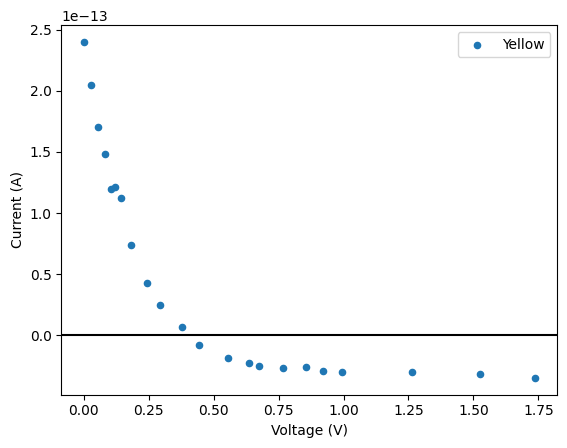

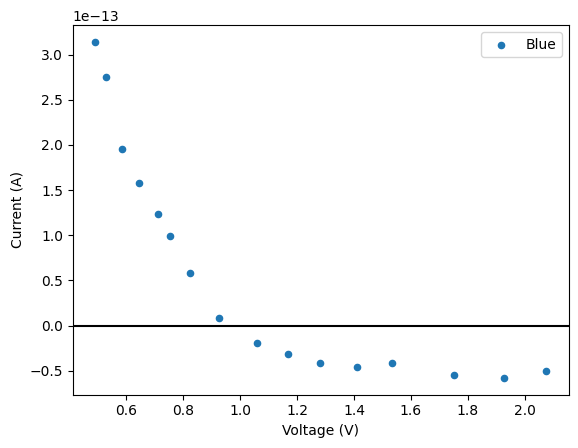

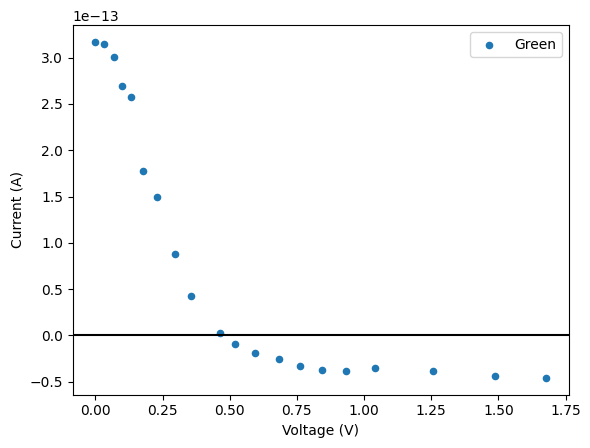

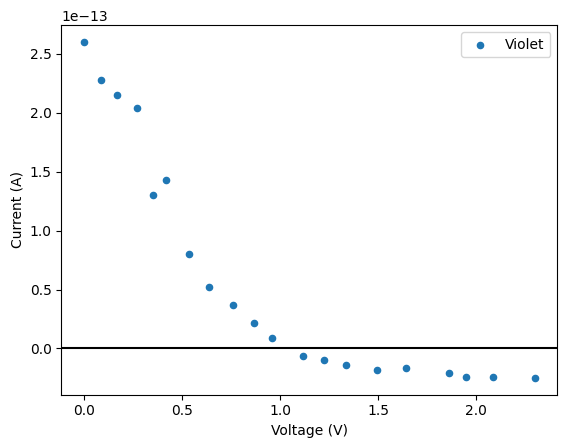

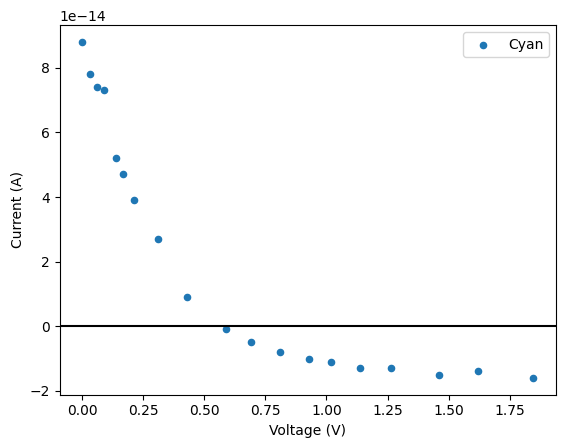

In [948]:
for color in colors:
    tmp = df[df["color"]==color]
    tmp.plot.scatter(x="Voltage (V)", y="Current (A)", label=color)
    plt.axhline(y=0, color="black")

In [949]:
df

,Voltage (V),Current (A),color,errV,errI
0,0.0000,2.400000e-13,Yellow,0.0001,1.000000e-15
1,0.0540,1.700000e-13,Yellow,0.0001,1.000000e-15
2,0.0829,1.480000e-13,Yellow,0.0001,1.000000e-15
3,0.1184,1.210000e-13,Yellow,0.0001,1.000000e-15
4,0.1814,7.400000e-14,Yellow,0.0001,1.000000e-15
...,...,...,...,...,...
14,1.1360,-1.300000e-14,Cyan,0.0010,1.000000e-15
15,1.2630,-1.300000e-14,Cyan,0.0010,1.000000e-15
16,1.4610,-1.500000e-14,Cyan,0.0010,1.000000e-15
17,1.6210,-1.400000e-14,Cyan,0.0010,1.000000e-15


# Data Analysis

In [950]:
def propagate_error_divmult(f, x, y, unx, uny):
    return r.TMath.Sqrt(((unx/x)**2 + (uny/y)**2) * f**2)

def propagate_error_power(f, b, x, unx):
    return r.TMath.Sqrt((f**2 * b**2 * (unx)**2/x**2))

def propagate_error_addsub(unx, uny, a=1, b=1):
    return r.TMath.Sqrt((a*unx)**2 + (b*uny)**2)

In [951]:
# calculate the intersection for two lines with equation y = mx + c
def intersection(m1, c1, m2, c2):
    x = (c2-c1)/(m1-m2)
    y = m1*x + c1
    return x,y

In [952]:
def intersection_err(m1, c1, m2, c2, err_m1, err_c1, err_m2, err_c2):
    x = (c2-c1)/(m1-m2)
    y = m1*x + c1
    err_x = propagate_error_divmult(f=x, x=c2-c1, y=m1-m2, unx=(propagate_error_addsub(err_c1,err_c2)), uny=(propagate_error_addsub(err_m1,err_m2)))
    err_y = propagate_error_divmult(f=y, x=m1,y=x, unx=err_m1, uny=err_x) + err_c1
    return err_x,err_y

In [953]:
Vs = {}
fit_err = {}
intersect_err ={}

In [954]:
tmp["errV"]

0     0.0001
1     0.0001
2     0.0001
3     0.0001
4     0.0001
5     0.0001
6     0.0001
7     0.0001
8     0.0010
9     0.0010
10    0.0010
11    0.0010
12    0.0010
13    0.0010
14    0.0010
15    0.0010
16    0.0010
17    0.0010
18    0.0010
Name: errV, dtype: float64

 FCN=21.141 FROM MIGRAD    STATUS=CONVERGED     165 CALLS         166 TOTAL
                     EDM=3.94962e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.28698e-12   2.48213e-14   4.02577e-18   5.03590e+10
   2  p1           9.51060e-13   1.33293e-14   2.16196e-18   9.43389e+10
 FCN=101.225 FROM MIGRAD    STATUS=CONVERGED      91 CALLS          92 TOTAL
                     EDM=4.5235e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.61649e-14   1.45564e-15   1.19542e-18   5.82086e+08
   2  p1          -2.19564e-14   2.45451e-15   3.00000e-15  -4.28420e+07


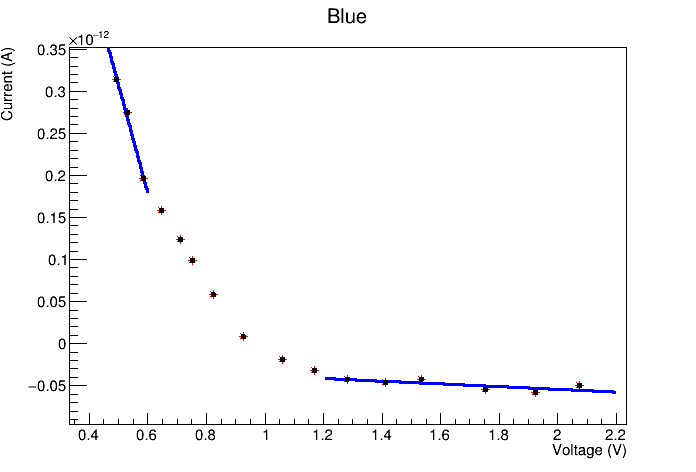

In [955]:
tmp = df[df["color"]=="Blue"]

c = r.TCanvas()
gr = r.TGraphErrors(len(tmp),tmp["Voltage (V)"].values, tmp["Current (A)"].values, tmp["errV"].values, tmp["errI"].values)

#Set point size
gr.SetLineWidth(3)
#Set point color
gr.SetMarkerColor(r.kRed)
#Set axis titles
gr.GetXaxis().SetTitle("Voltage (V)")
gr.GetYaxis().SetTitle("Current (A)")
#Set title
gr.SetTitle("Blue")

#fit a line
f_1 = r.TF1("ffline", "[0]*x + [1]",0.4,0.6)
f_1.SetParameters(-0.01e-9,0.005e-9)
f_1.SetLineWidth(3)
f_1.SetLineColor(r.kBlue)
gr.Fit(f_1,"R")

f_2 = r.TF1("ffline", "[0]*x + [1]",1.2,2.2)
f_2.SetParameters(-0.01e-9,0e-9)
f_2.SetLineWidth(3)
f_2.SetLineColor(r.kBlue)
gr.Fit(f_2,"R+")

inter = intersection(f_1.GetParameter(0), f_1.GetParameter(1), f_2.GetParameter(0), f_2.GetParameter(1))
Vs.update({"Blue":inter[0]})

fit_err.update({"Blue":[f_1.GetParError(0), f_1.GetParError(1), f_2.GetParError(0), f_2.GetParError(1)]})
intersect_err.update({"Blue":intersection_err(f_1.GetParameter(0), f_1.GetParameter(1), f_2.GetParameter(0), f_2.GetParameter(1), f_1.GetParError(0), f_1.GetParError(1), f_2.GetParError(0), f_2.GetParError(1))})

gr.Draw("AP*")
c.Draw()

In [956]:
tmp["errV"]

0     0.001
1     0.001
2     0.001
3     0.001
4     0.001
5     0.001
6     0.001
7     0.001
8     0.001
9     0.001
10    0.001
11    0.001
12    0.001
13    0.001
14    0.001
15    0.001
Name: errV, dtype: float64

 FCN=70.2059 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=3.21542e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.12319e-12   1.62858e-14   4.04919e-17  -1.26600e+09
   2  p1           2.36604e-13   8.33791e-16   2.07309e-18   6.78389e+09
 FCN=12.3575 FROM MIGRAD    STATUS=CONVERGED     105 CALLS         106 TOTAL
                     EDM=3.97128e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -9.05187e-15   9.15046e-16   5.38966e-19  -1.13711e+09
   2  p1          -1.91245e-14   1.00997e-15   5.94879e-19  -1.58233e+08


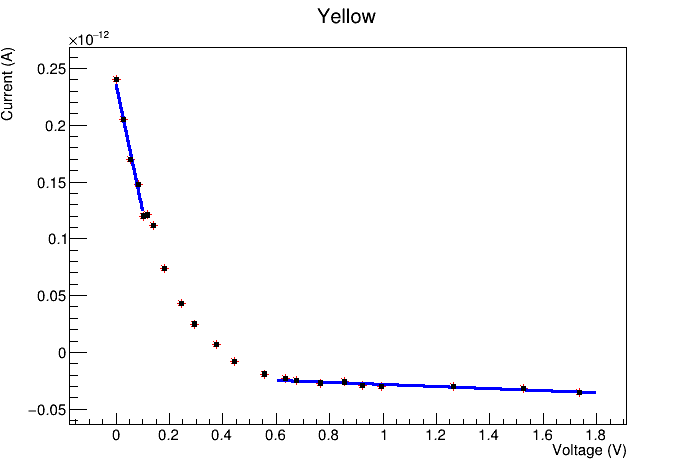

In [957]:
tmp = df[df["color"]=="Yellow"]

c = r.TCanvas()
gr = r.TGraphErrors(len(tmp),tmp["Voltage (V)"].values, tmp["Current (A)"].values, tmp["errV"].values, tmp["errI"].values)

#Set point size
gr.SetLineWidth(3)
#Set point color
gr.SetMarkerColor(r.kRed)
#Set axis titles
gr.GetYaxis().SetTitle("Current (A)")
gr.GetXaxis().SetTitle("Voltage (V)")
#Set title
gr.SetTitle("Yellow")

#fit a line
f_1 = r.TF1("ffline", "[0]*x + [1]",0,0.1)
f_1.SetParameters(-0.01e-9,0.002e-9)
f_1.SetLineWidth(3)
f_1.SetLineColor(r.kBlue)
gr.Fit(f_1,"R")

f_2 = r.TF1("ffline", "[0]*x + [1]",0.6,1.8)
f_2.SetParameters(0,0)
f_2.SetLineWidth(3)
f_2.SetLineColor(r.kBlue)
gr.Fit(f_2,"R+")

inter = intersection(f_1.GetParameter(0), f_1.GetParameter(1), f_2.GetParameter(0), f_2.GetParameter(1))
Vs.update({"Yellow":inter[0]})

fit_err.update({"Yellow":[f_1.GetParError(0), f_1.GetParError(1), f_2.GetParError(0), f_2.GetParError(1)]})
intersect_err.update({"Yellow":intersection_err(f_1.GetParameter(0), f_1.GetParameter(1), f_2.GetParameter(0), f_2.GetParameter(1), f_1.GetParError(0), f_1.GetParError(1), f_2.GetParError(0), f_2.GetParError(1))})

gr.Draw("A*")
c.Draw()

 FCN=1897.68 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=1.05984e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -7.51121e-13   6.91882e-15   8.35074e-17   2.81033e+08
   2  p1           3.37521e-13   7.21687e-16   8.71048e-18  -3.97490e+09
 FCN=1.06035 FROM MIGRAD    STATUS=CONVERGED     100 CALLS         101 TOTAL
                     EDM=4.70955e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.77858e-14   2.08286e-15   2.52889e-19  -1.14144e+09
   2  p1          -1.67224e-14   2.88675e-15   3.50493e-19   2.42410e+08


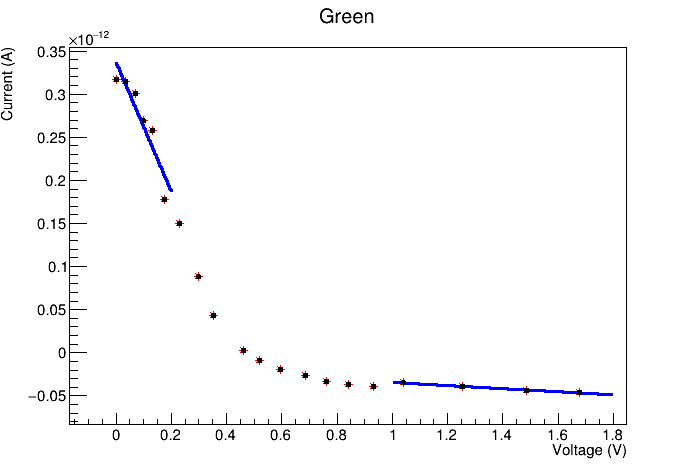

In [958]:
tmp = df[df["color"]=="Green"]

c = r.TCanvas()
gr = r.TGraphErrors(len(tmp),tmp["Voltage (V)"].values, tmp["Current (A)"].values, tmp["errV"].values, tmp["errI"].values)

#Set point size
gr.SetLineWidth(3)
#Set point color
gr.SetMarkerColor(r.kRed)
#Set axis titles
gr.GetXaxis().SetTitle("Voltage (V)")
gr.GetYaxis().SetTitle("Current (A)")
#Set title
gr.SetTitle("Green")

#fit a line
f_1 = r.TF1("ffline", "[0]*x + [1]",0,0.2)
f_1.SetParameters(-0.01e-9,0.003e-9)
f_1.SetLineWidth(3)
f_1.SetLineColor(r.kBlue)
gr.Fit(f_1,"R")

f_2 = r.TF1("ffline", "[0]*x + [1]",1,1.8)
f_2.SetParameters(0,0)
f_2.SetLineWidth(3)
f_2.SetLineColor(r.kBlue)
gr.Fit(f_2,"R+")

inter = intersection(f_1.GetParameter(0), f_1.GetParameter(1), f_2.GetParameter(0), f_2.GetParameter(1))
Vs.update({"Green":inter[0]})

fit_err.update({"Green":[f_1.GetParError(0), f_1.GetParError(1), f_2.GetParError(0), f_2.GetParError(1)]})
intersect_err.update({"Green":intersection_err(f_1.GetParameter(0), f_1.GetParameter(1), f_2.GetParameter(0), f_2.GetParameter(1), f_1.GetParError(0), f_1.GetParError(1), f_2.GetParError(0), f_2.GetParError(1))})

gr.Draw("AP*")
c.Draw()

 FCN=55.016 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=1.20982e-15    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -2.42580e-13   7.00381e-15   1.48464e-17  -9.41042e+06
   2  p1           8.85299e-14   7.04033e-16   1.49238e-18  -3.22925e+07
 FCN=1.3905 FROM MIGRAD    STATUS=CONVERGED      93 CALLS          94 TOTAL
                     EDM=2.52e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -3.07830e-15   3.94301e-15   2.99419e-19   1.76662e+09
   2  p1          -9.54160e-15   5.73990e-15   3.00000e-17   1.22734e+09


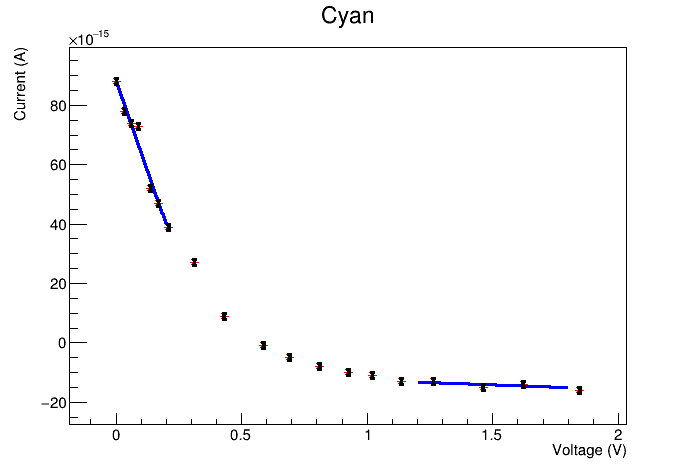

In [959]:
tmp = df[df["color"] == "Cyan"]

c = r.TCanvas()
gr = r.TGraphErrors(len(tmp), tmp["Voltage (V)"].values, tmp["Current (A)"].values, tmp["errV"].values, tmp["errI"].values)

#Set point size
gr.SetLineWidth(3)
#Set point color
gr.SetMarkerColor(r.kRed)
#Set axis titles
gr.GetXaxis().SetTitle("Voltage (V)")
gr.GetYaxis().SetTitle("Current (A)")
#Set title
gr.SetTitle("Cyan")

#fit a line
f_1 = r.TF1("ffline", "[0]*x + [1]", 0, 0.2)
f_1.SetParameters(-0.002e-9, 0.0008e-9)
f_1.SetLineWidth(3)
f_1.SetLineColor(r.kBlue)
gr.Fit(f_1, "R")

f_2 = r.TF1("ffline", "[0]*x + [1]", 1.2, 1.8)
f_2.SetParameters(-0.01e-9, 0)
f_2.SetLineWidth(3)
f_2.SetLineColor(r.kBlue)
gr.Fit(f_2, "R+")

inter = intersection(f_1.GetParameter(0), f_1.GetParameter(1), f_2.GetParameter(0), f_2.GetParameter(1))
Vs.update({"Cyan":inter[0]})

fit_err.update({"Cyan":[f_1.GetParError(0), f_1.GetParError(1), f_2.GetParError(0), f_2.GetParError(1)]})
intersect_err.update({"Cyan":intersection_err(f_1.GetParameter(0), f_1.GetParameter(1), f_2.GetParameter(0), f_2.GetParameter(1), f_1.GetParError(0), f_1.GetParError(1), f_2.GetParError(0), f_2.GetParError(1))})

gr.Draw("A*")
c.Draw()

 FCN=1350.6 FROM MIGRAD    STATUS=CONVERGED      89 CALLS          90 TOTAL
                     EDM=3.73977e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -2.97838e-13   2.84280e-15   2.87503e-17   1.69182e+11
   2  p1           2.60768e-13   7.29892e-16   7.38162e-18   4.93547e+11
 FCN=7.39249 FROM MIGRAD    STATUS=CONVERGED      84 CALLS          85 TOTAL
                     EDM=4.83169e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.21443e-14   2.04395e-15   3.19621e-19  -1.33380e+12
   2  p1           1.69024e-15   4.04574e-15   3.00000e-15  -4.38444e+11


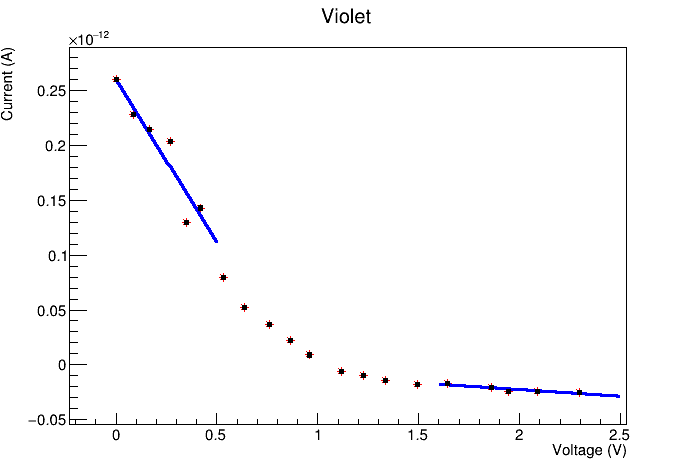

In [960]:
tmp = df[df["color"] == "Violet"]

c = r.TCanvas()
gr = r.TGraphErrors(len(tmp), tmp["Voltage (V)"].values, tmp["Current (A)"].values, tmp["errV"].values, tmp["errI"].values)

#Set point size
gr.SetLineWidth(3)
#Set point color
gr.SetMarkerColor(r.kRed)
gr.SetMarkerStyle(3)
#Set axis titles
gr.GetXaxis().SetTitle("Voltage (V)")
gr.GetYaxis().SetTitle("Current (A)")
#Set title
gr.SetTitle("Violet")

#fit a line
f_1 = r.TF1("ffline", "[0]*x + [1]", 0, 0.5)
f_1.SetParameters(-0.0005e-9, 0.0035e-9)
f_1.SetLineWidth(3)
f_1.SetLineColor(r.kBlue)
gr.Fit(f_1, "R")

f_2 = r.TF1("ffline", "[0]*x + [1]", 1.6, 2.5)
f_2.SetParameters(-0.01e-9, 0)
f_2.SetLineWidth(3)
f_2.SetLineColor(r.kBlue)
gr.Fit(f_2, "R+")

inter = intersection(f_1.GetParameter(0), f_1.GetParameter(1), f_2.GetParameter(0), f_2.GetParameter(1))
Vs.update({"Violet":inter[0]})

fit_err.update({"Violet":[f_1.GetParError(0), f_1.GetParError(1), f_2.GetParError(0), f_2.GetParError(1)]})
intersect_err.update({"Violet":intersection_err(f_1.GetParameter(0), f_1.GetParameter(1), f_2.GetParameter(0), f_2.GetParameter(1), f_1.GetParError(0), f_1.GetParError(1), f_2.GetParError(0), f_2.GetParError(1))})

gr.Draw("AP")
c.Draw()

In [961]:
Vs

{'Blue': 0.76566220145138,
 'Yellow': 0.22953066290182988,
 'Green': 0.4830581100812119,
 'Cyan': 0.4094817605111149,
 'Violet': 0.9068384001201784}

In [962]:
#got these values from britannica
wavelenght_blue = 450e-9
wavelenght_yellow = 580e-9
wavelenght_green = 550e-9
wavelenght_cyan = 500e-9
wavelenght_violet = 400e-9

speed_of_light = 299792458

def wavelenght_to_freq(wavelength):
    return speed_of_light / wavelength

In [963]:
freq_blue = wavelenght_to_freq(wavelenght_blue)
freq_yellow = wavelenght_to_freq(wavelenght_yellow)
freq_green = wavelenght_to_freq(wavelenght_green)
freq_cyan = wavelenght_to_freq(wavelenght_cyan)
freq_violet = wavelenght_to_freq(wavelenght_violet)

In [964]:
freq ={
    "Blue":freq_blue,
    "Yellow":freq_yellow,
    "Green":freq_green,
    "Cyan":freq_cyan,
    "Violet":freq_violet
}

In [965]:
Vs

{'Blue': 0.76566220145138,
 'Yellow': 0.22953066290182988,
 'Green': 0.4830581100812119,
 'Cyan': 0.4094817605111149,
 'Violet': 0.9068384001201784}

In [966]:
v_f = {"Blue":[freq["Blue"],Vs["Blue"]], "Yellow":[freq["Yellow"],Vs["Yellow"]], "Green":[freq["Green"],Vs["Green"]], "Cyan":[freq["Cyan"],Vs["Cyan"]], "Violet":[freq["Violet"],Vs["Violet"]]}

In [967]:
v_f

{'Blue': [666205462222222.2, 0.76566220145138],
 'Yellow': [516883548275862.1, 0.22953066290182988],
 'Green': [545077196363636.3, 0.4830581100812119],
 'Cyan': [599584916000000.0, 0.4094817605111149],
 'Violet': [749481145000000.0, 0.9068384001201784]}

In [968]:
v_f_df = pd.DataFrame(v_f)

In [969]:
intersect_err_df = pd.DataFrame(intersect_err)

In [970]:
v_f_err = intersect_err_df.T[[0]]
v_f_err.columns= ["errVs"]
v_f_err["errF"] = [speed_of_light*10e-8 for i in range(5)]

In [971]:
v_f_err

,errVs,errF
Blue,0.018389,29.979246
Yellow,0.003560,29.979246
Green,0.006254,29.979246
Cyan,0.027782,29.979246
Violet,0.018182,29.979246


In [972]:
c = r.TCanvas()
gr = r.TGraphErrors(5, v_f_df.iloc[0].T.values/1 ,v_f_df.iloc[1].T.values/1, v_f_err["errF"].values, v_f_err["errVs"].values)

 FCN=567.871 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=1.64482e-15    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.27137e-15   6.68249e-17   1.76764e-13   1.02372e+10
   2  p1          -1.42654e+00   3.58457e-02   3.48394e-05   1.91711e-05


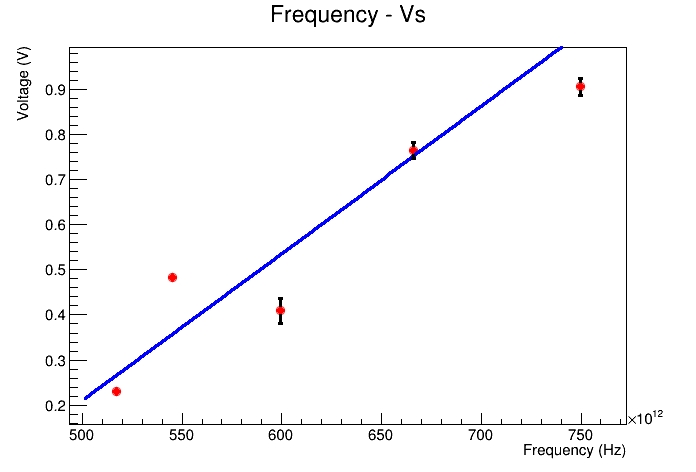

In [984]:
#Set point size
gr.SetLineWidth(3)
#Set point color
gr.SetMarkerColor(r.kRed)
gr.SetMarkerStyle(20)
#Set axis titles
gr.GetXaxis().SetTitle("Frequency (Hz)")
gr.GetYaxis().SetTitle("Voltage (V)")
#Set title
gr.SetTitle("Frequency - Vs")

#fit a line
f_1 = r.TF1("ffline", "[0]*x + [1]", 500e12, 800e12)
f_1.SetParameters(0, 0)
f_1.SetLineWidth(3),
f_1.SetLineColor(r.kBlue)
gr.Fit(f_1, "R")

gr.Draw("AP")
c.Draw()

In [985]:
charge_of_electron = 1.602176634e-19

In [986]:
h = charge_of_electron * f_1.GetParameter(0)

In [987]:
h

5.241320241296836e-34

In [994]:
phi = -f_1.GetParameter(1)

In [1013]:
phi*charge_of_electron

3.6618881740471006e-38

In [988]:
planck_constant = 6.62607015e-34

In [989]:
#calculate the error
def error(pred, true):
    return abs(pred - true) / true

In [990]:
planck_err = f_1.GetParError(0)*charge_of_electron

In [991]:
print("h:", h, " +/- ", planck_err, "Error:", error(h, planck_constant)*100, "%")

h: 5.241320241296836e-34  +/-  1.0706534861012359e-35 Error: 20.898509634751814 %


In [992]:
print(abs(planck_constant - h)/planck_err)

12.93368887954313


In [997]:
df

,Voltage (V),Current (A),color,errV,errI
0,0.0000,2.400000e-13,Yellow,0.0001,1.000000e-15
1,0.0540,1.700000e-13,Yellow,0.0001,1.000000e-15
2,0.0829,1.480000e-13,Yellow,0.0001,1.000000e-15
3,0.1184,1.210000e-13,Yellow,0.0001,1.000000e-15
4,0.1814,7.400000e-14,Yellow,0.0001,1.000000e-15
...,...,...,...,...,...
14,1.1360,-1.300000e-14,Cyan,0.0010,1.000000e-15
15,1.2630,-1.300000e-14,Cyan,0.0010,1.000000e-15
16,1.4610,-1.500000e-14,Cyan,0.0010,1.000000e-15
17,1.6210,-1.400000e-14,Cyan,0.0010,1.000000e-15


In [1009]:
print(df.to_latex(index=False, col_space=5))

\begin{tabular}{rrlrr}
\toprule
 Voltage (V) &   Current (A) &  color &   errV &         errI \\
\midrule
      0.0000 &  2.400000e-13 & Yellow & 0.0001 & 1.000000e-15 \\
      0.0540 &  1.700000e-13 & Yellow & 0.0001 & 1.000000e-15 \\
      0.0829 &  1.480000e-13 & Yellow & 0.0001 & 1.000000e-15 \\
      0.1184 &  1.210000e-13 & Yellow & 0.0001 & 1.000000e-15 \\
      0.1814 &  7.400000e-14 & Yellow & 0.0001 & 1.000000e-15 \\
      0.2440 &  4.300000e-14 & Yellow & 0.0001 & 1.000000e-15 \\
      0.2921 &  2.500000e-14 & Yellow & 0.0001 & 1.000000e-15 \\
      0.3780 &  7.000000e-15 & Yellow & 0.0001 & 1.000000e-15 \\
      0.0264 &  2.050000e-13 & Yellow & 0.0001 & 1.000000e-15 \\
      0.1040 &  1.200000e-13 & Yellow & 0.0001 & 1.000000e-15 \\
      0.1420 &  1.120000e-13 & Yellow & 0.0001 & 1.000000e-15 \\
      0.4450 & -8.000000e-15 & Yellow & 0.0010 & 1.000000e-15 \\
      0.5550 & -1.900000e-14 & Yellow & 0.0010 & 1.000000e-15 \\
      0.6360 & -2.300000e-14 & Yellow & 0.0010 & 

/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_78539/3306219322.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False, col_space=5))
